<a href="https://colab.research.google.com/github/kumapri/fraud-detection/blob/main/Credit_card_fraud_detection_Starter_code%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#install scikit-optimize
!pip install scikit-optimize
from skopt import BayesSearchCV


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.5 MB/s eta 0:00:00


## Exploratory data analysis

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
#observe the different feature type present in the data
df.describe()


Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))


Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


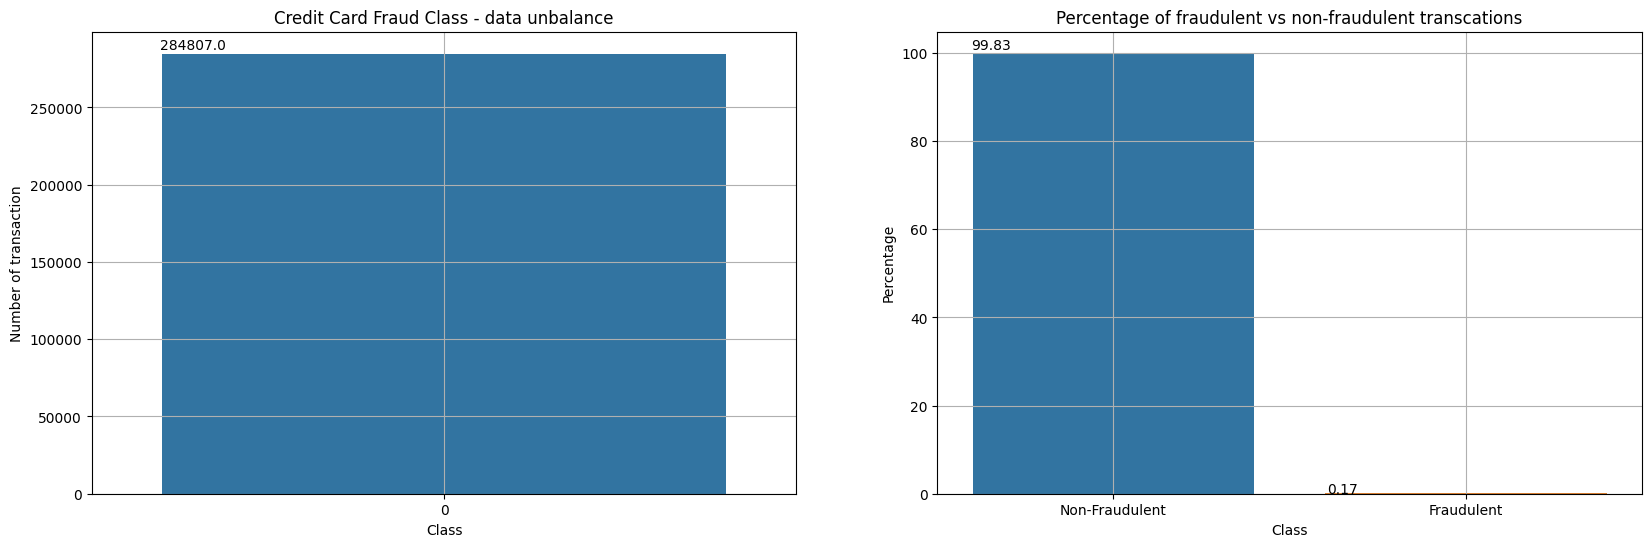

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
ax=sns.countplot(df["Class"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - data unbalance")
plt.grid()
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
ax=sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()

Observation

The dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction.

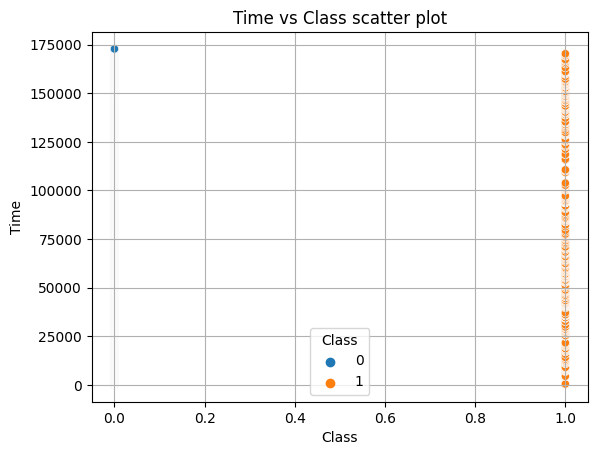

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
import seaborn as sns

sns.scatterplot(data=df, x=df["Class"], y=df["Time"], hue=df["Class"])

plt.title("Time vs Class scatter plot")
plt.grid()

Observation

There is not much insight can be drawn from the distribution of the fraudulent transaction based on time as fraudulent/non-fraudulent both transaction are distributed over time.

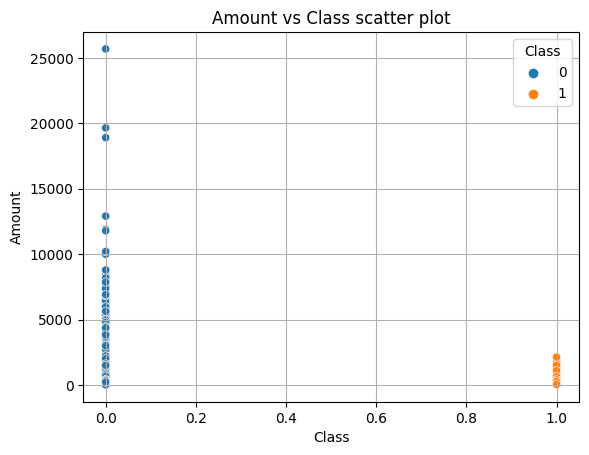

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(data=df, x=df["Class"], y=df["Amount"], hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

Observation

Clearly low amount transactions are more likely to be fraudulent than high amount transaction.

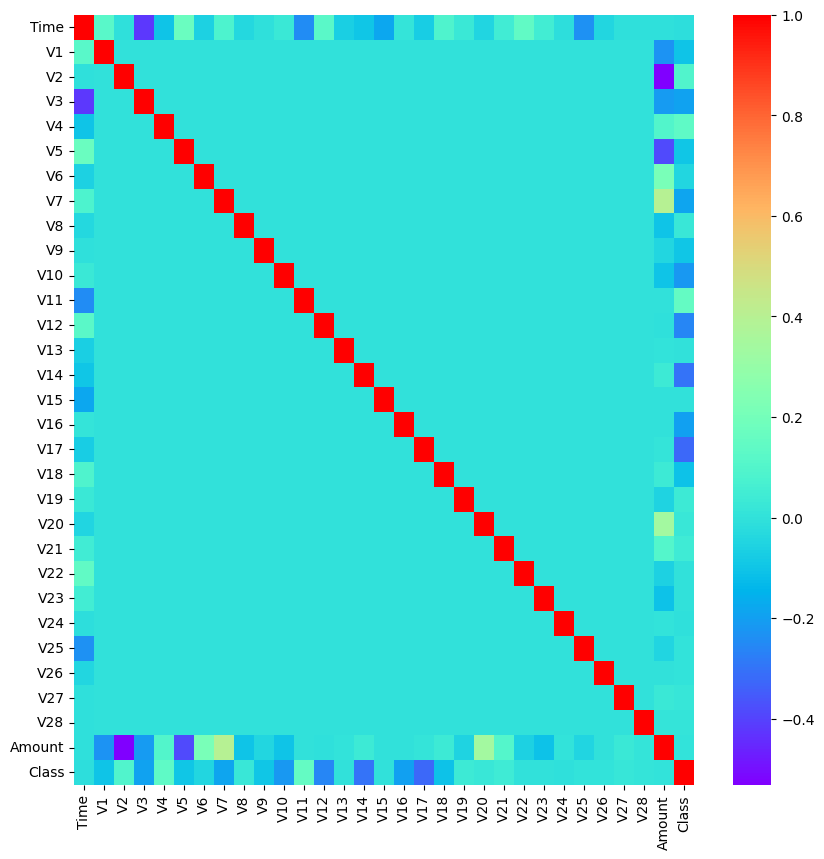

In [8]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),cmap='rainbow')
plt.show()

There are no features which there is high correlatation , corr > .75

Plotting the distributions of all the features


<Figure size 640x480 with 0 Axes>

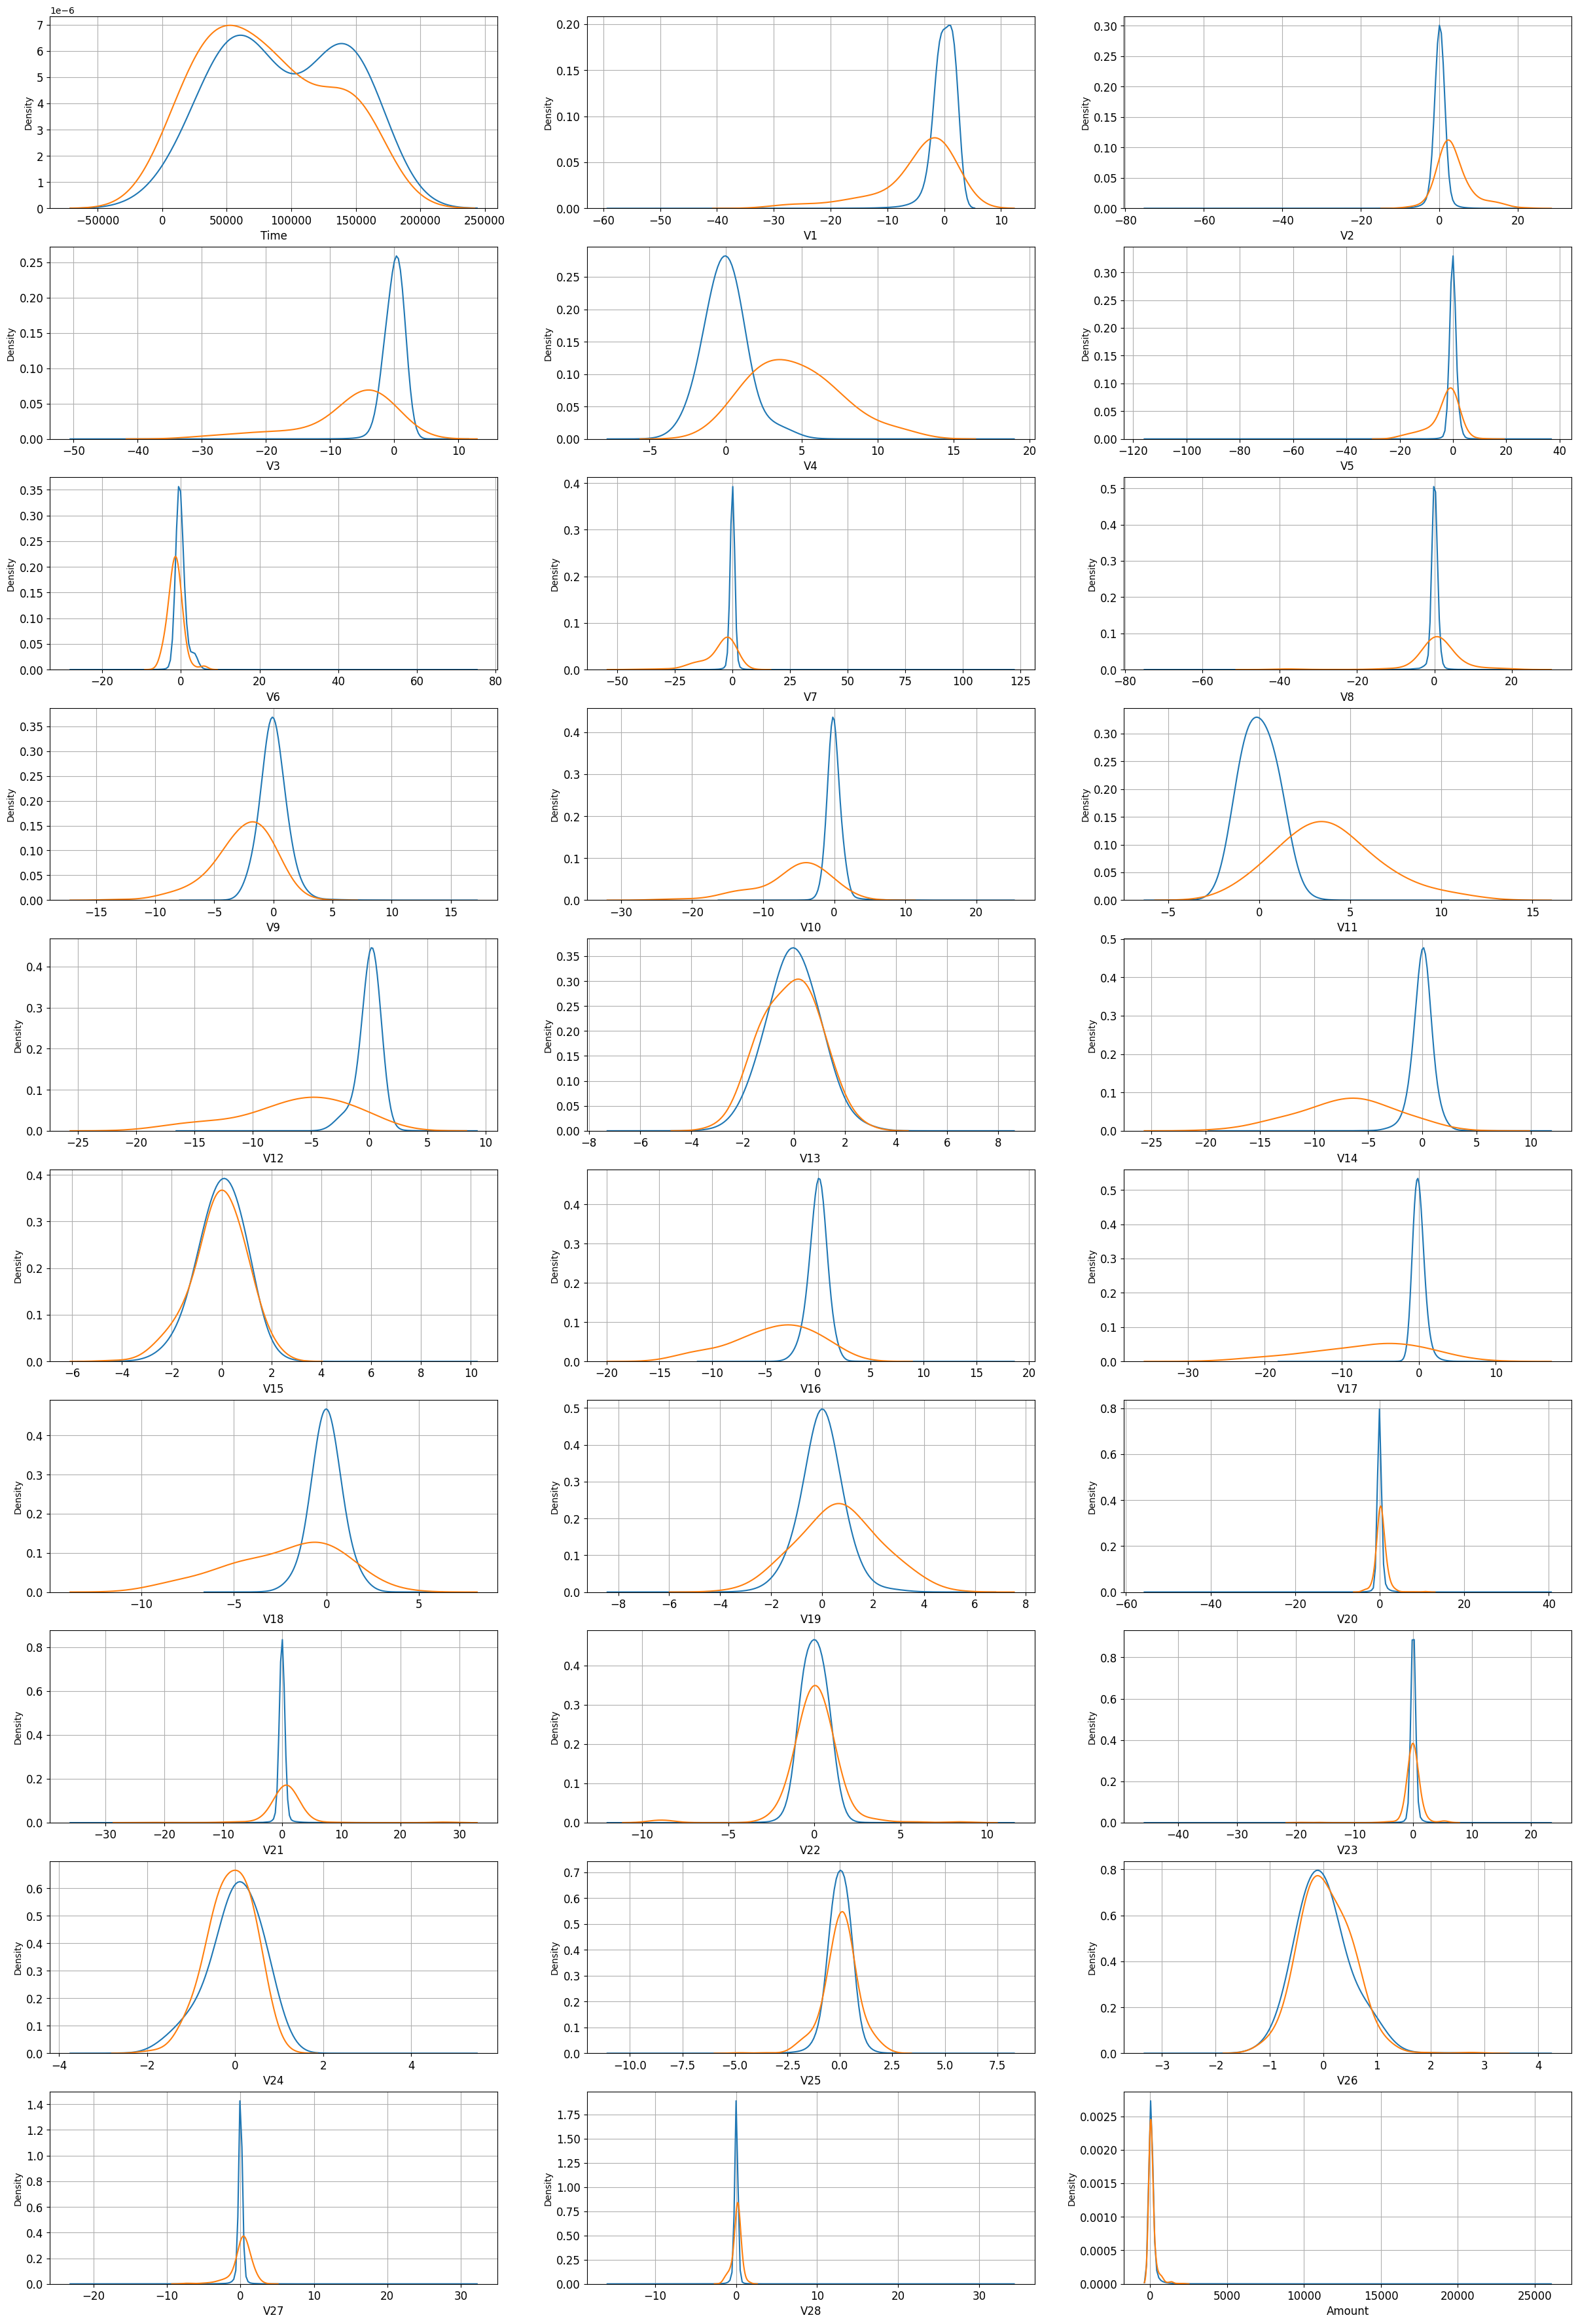

In [9]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

Dropping Time column as this feature is not going to help in the model building.

Understanding from Core Banking Busines

In [10]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()
cor


Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

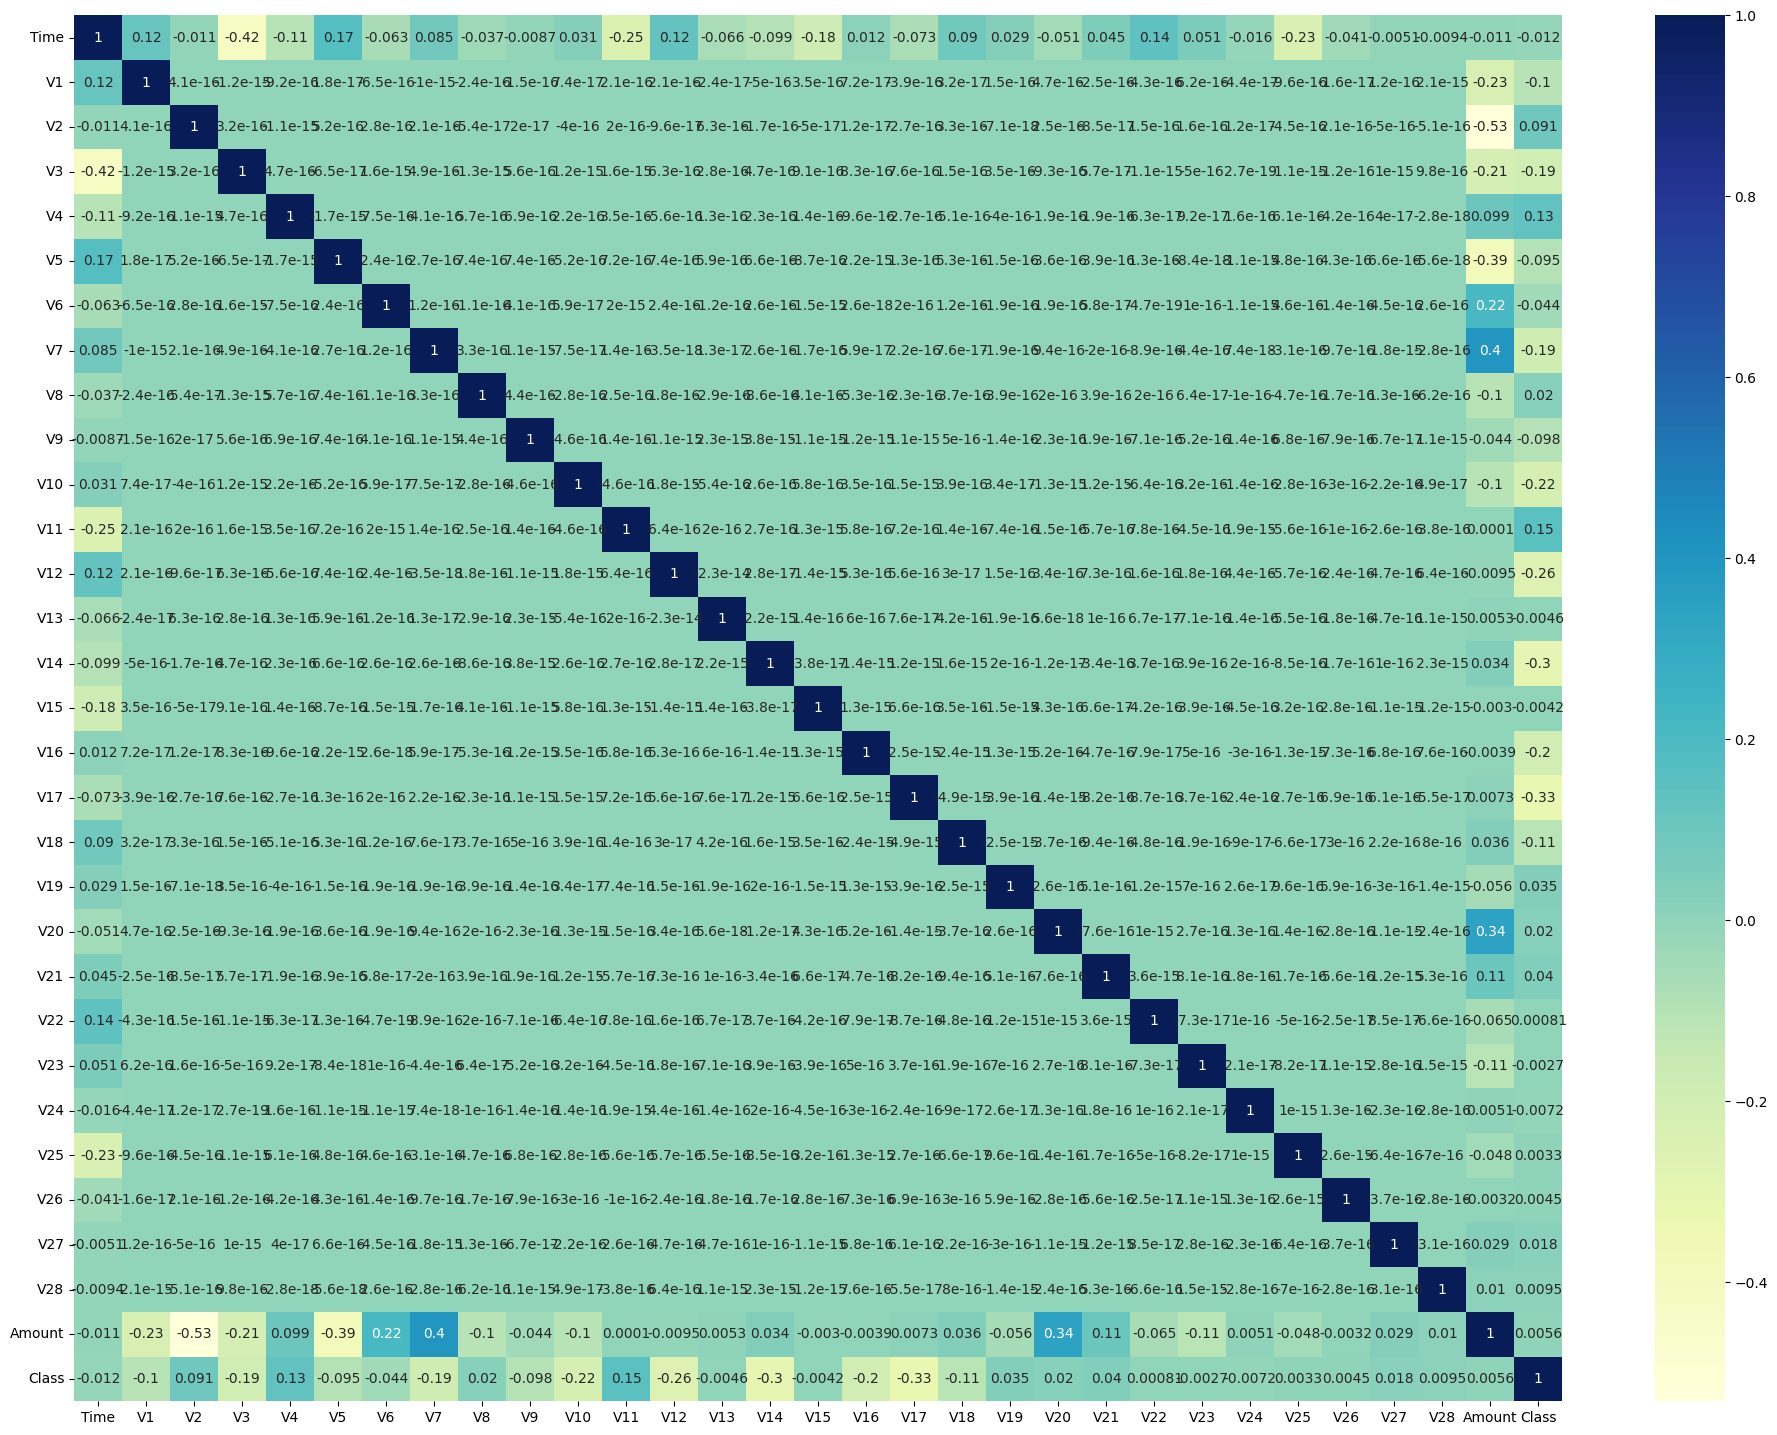

In [11]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

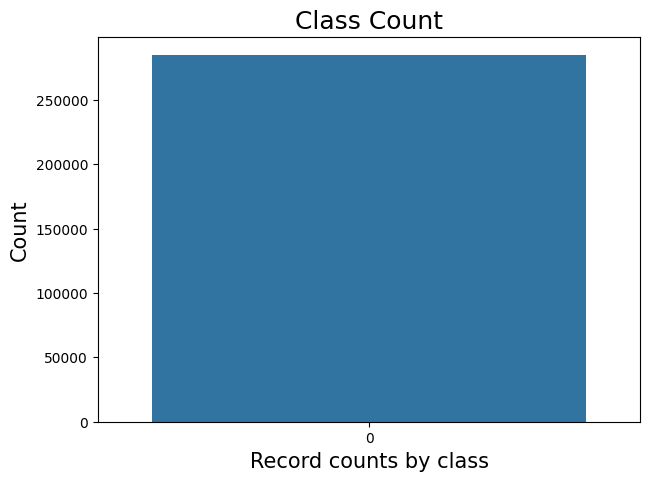

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record counts by class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

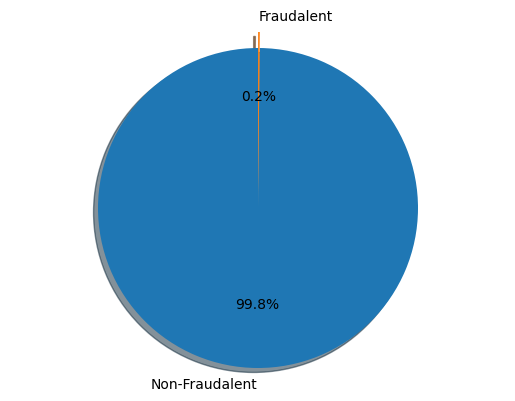

In [14]:
#plt.title('Dsitribution of the Fraudalent vs Non-fraudalent transaction in Percentages')
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


labels = 'Non-Fraudalent', 'Fraudalent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [15]:
print('The percentage without churn prediction is ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('The percentage with churn prediction is ', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('The ratio of imbalance is', round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,2))

The percentage without churn prediction is  99.83 % of the dataset
The percentage with churn prediction is  0.17 % of the dataset
The ratio of imbalance is 0.17


So we have 492 fraudalent transactions out of 284807 total credit card transactions.
Target variable distribution shows that we are dealing with an highly imbalanced problem as there are many more genuine transactions class as compared to the fraudalent transactions. The model would achieve high accuracy as it would mostly predict majority class — transactions which are genuine in our example. To overcome this we will use other metrics for model evaluation such as ROC-AUC , precision and recall etc

In [16]:
# Create a scatter plot to observe the distribution of classes with time
#As time is given in relative fashion, we will need to use pandas.Timedelta which Represents a duration, the difference between two dates or times.

Delta_Time = pd.to_timedelta(df['Time'], unit='s')
#Create derived columns Mins and hours
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

Text(0.5, 1.05, 'Time vs Class Distribution')

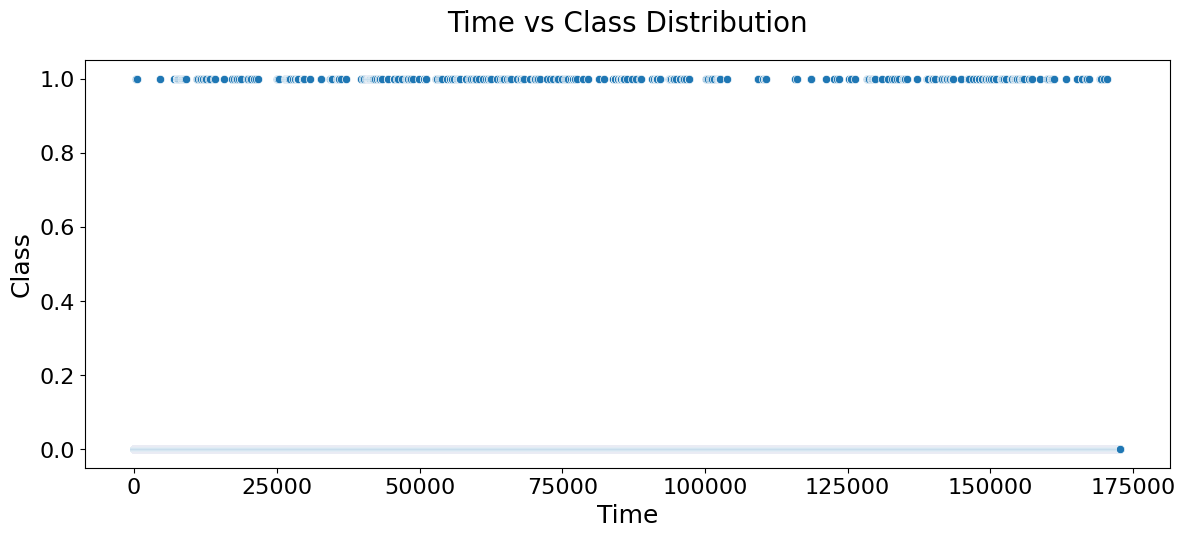

In [17]:
# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with time

fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set2')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)

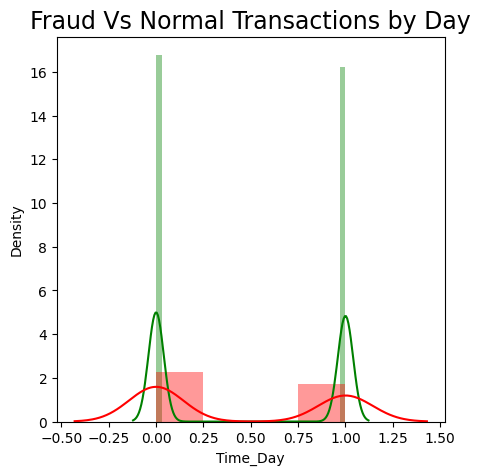

In [18]:
#The fraus Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='red')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

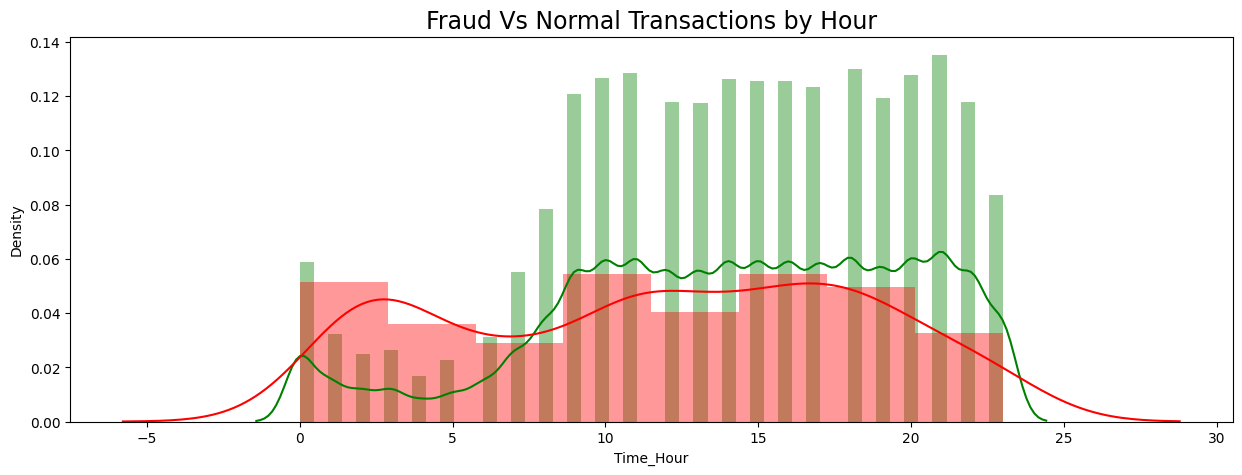

In [19]:
#The fraus Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='red')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

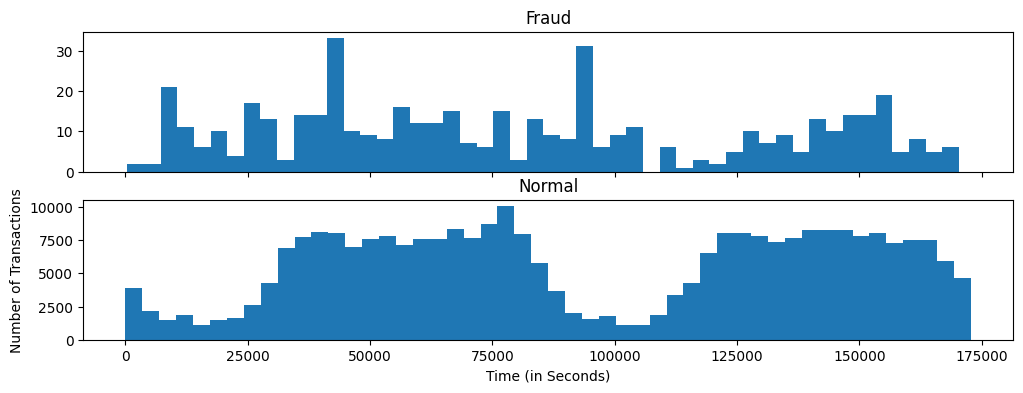

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [21]:
# Create a scatter plot to observe the distribution of classes with Amount
#To clearly the data of frauds and no frauds
df_Fraud = df[df['Class'] == 1]
df_Regular = df[df['Class'] == 0]

# Fraud Transaction Amount Statistics
print(df_Fraud["Amount"].describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [22]:
#Regular Transaction Amount Statistics
print(df_Regular["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Text(0.5, 1.05, 'Amount vs Class Distribution')

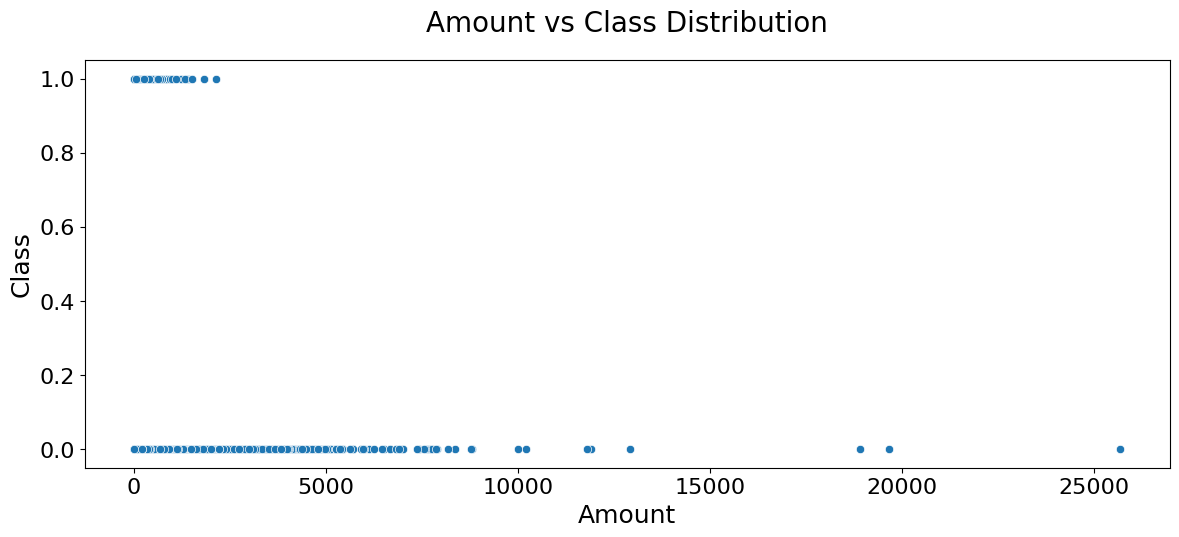

In [23]:
# Create a scatter plot to observe the distribution of classes with Amount

# Bivariate Analysis: Create a scatter plot to observe the distribution of classes with Amount


fig = plt.figure(figsize=(14, 18))
cmap = sns.color_palette('Set1')

# PLot the relation between the variables:

plt.subplot(3,1,1)
sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)

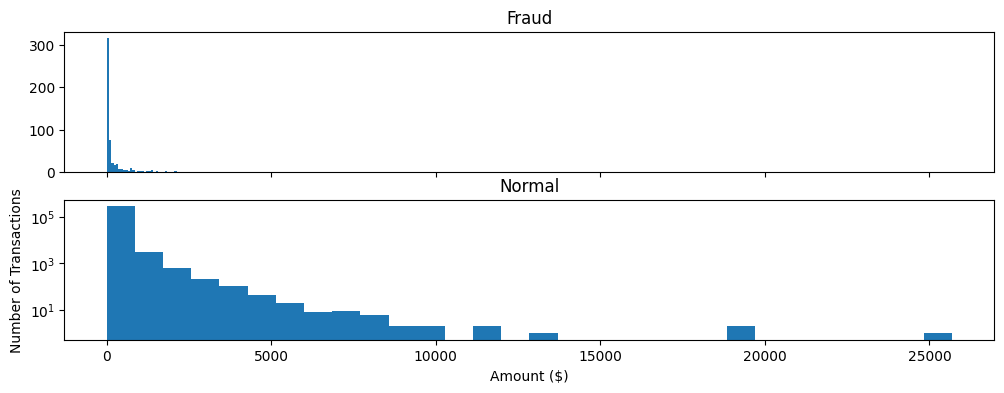

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [25]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


Correlation
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413

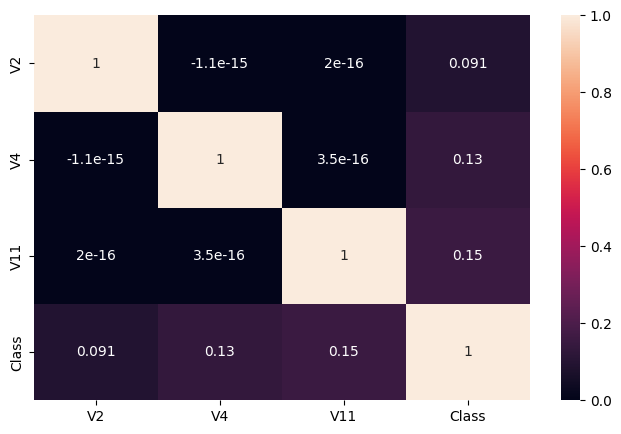

In [26]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Plotting the distribution of a variable

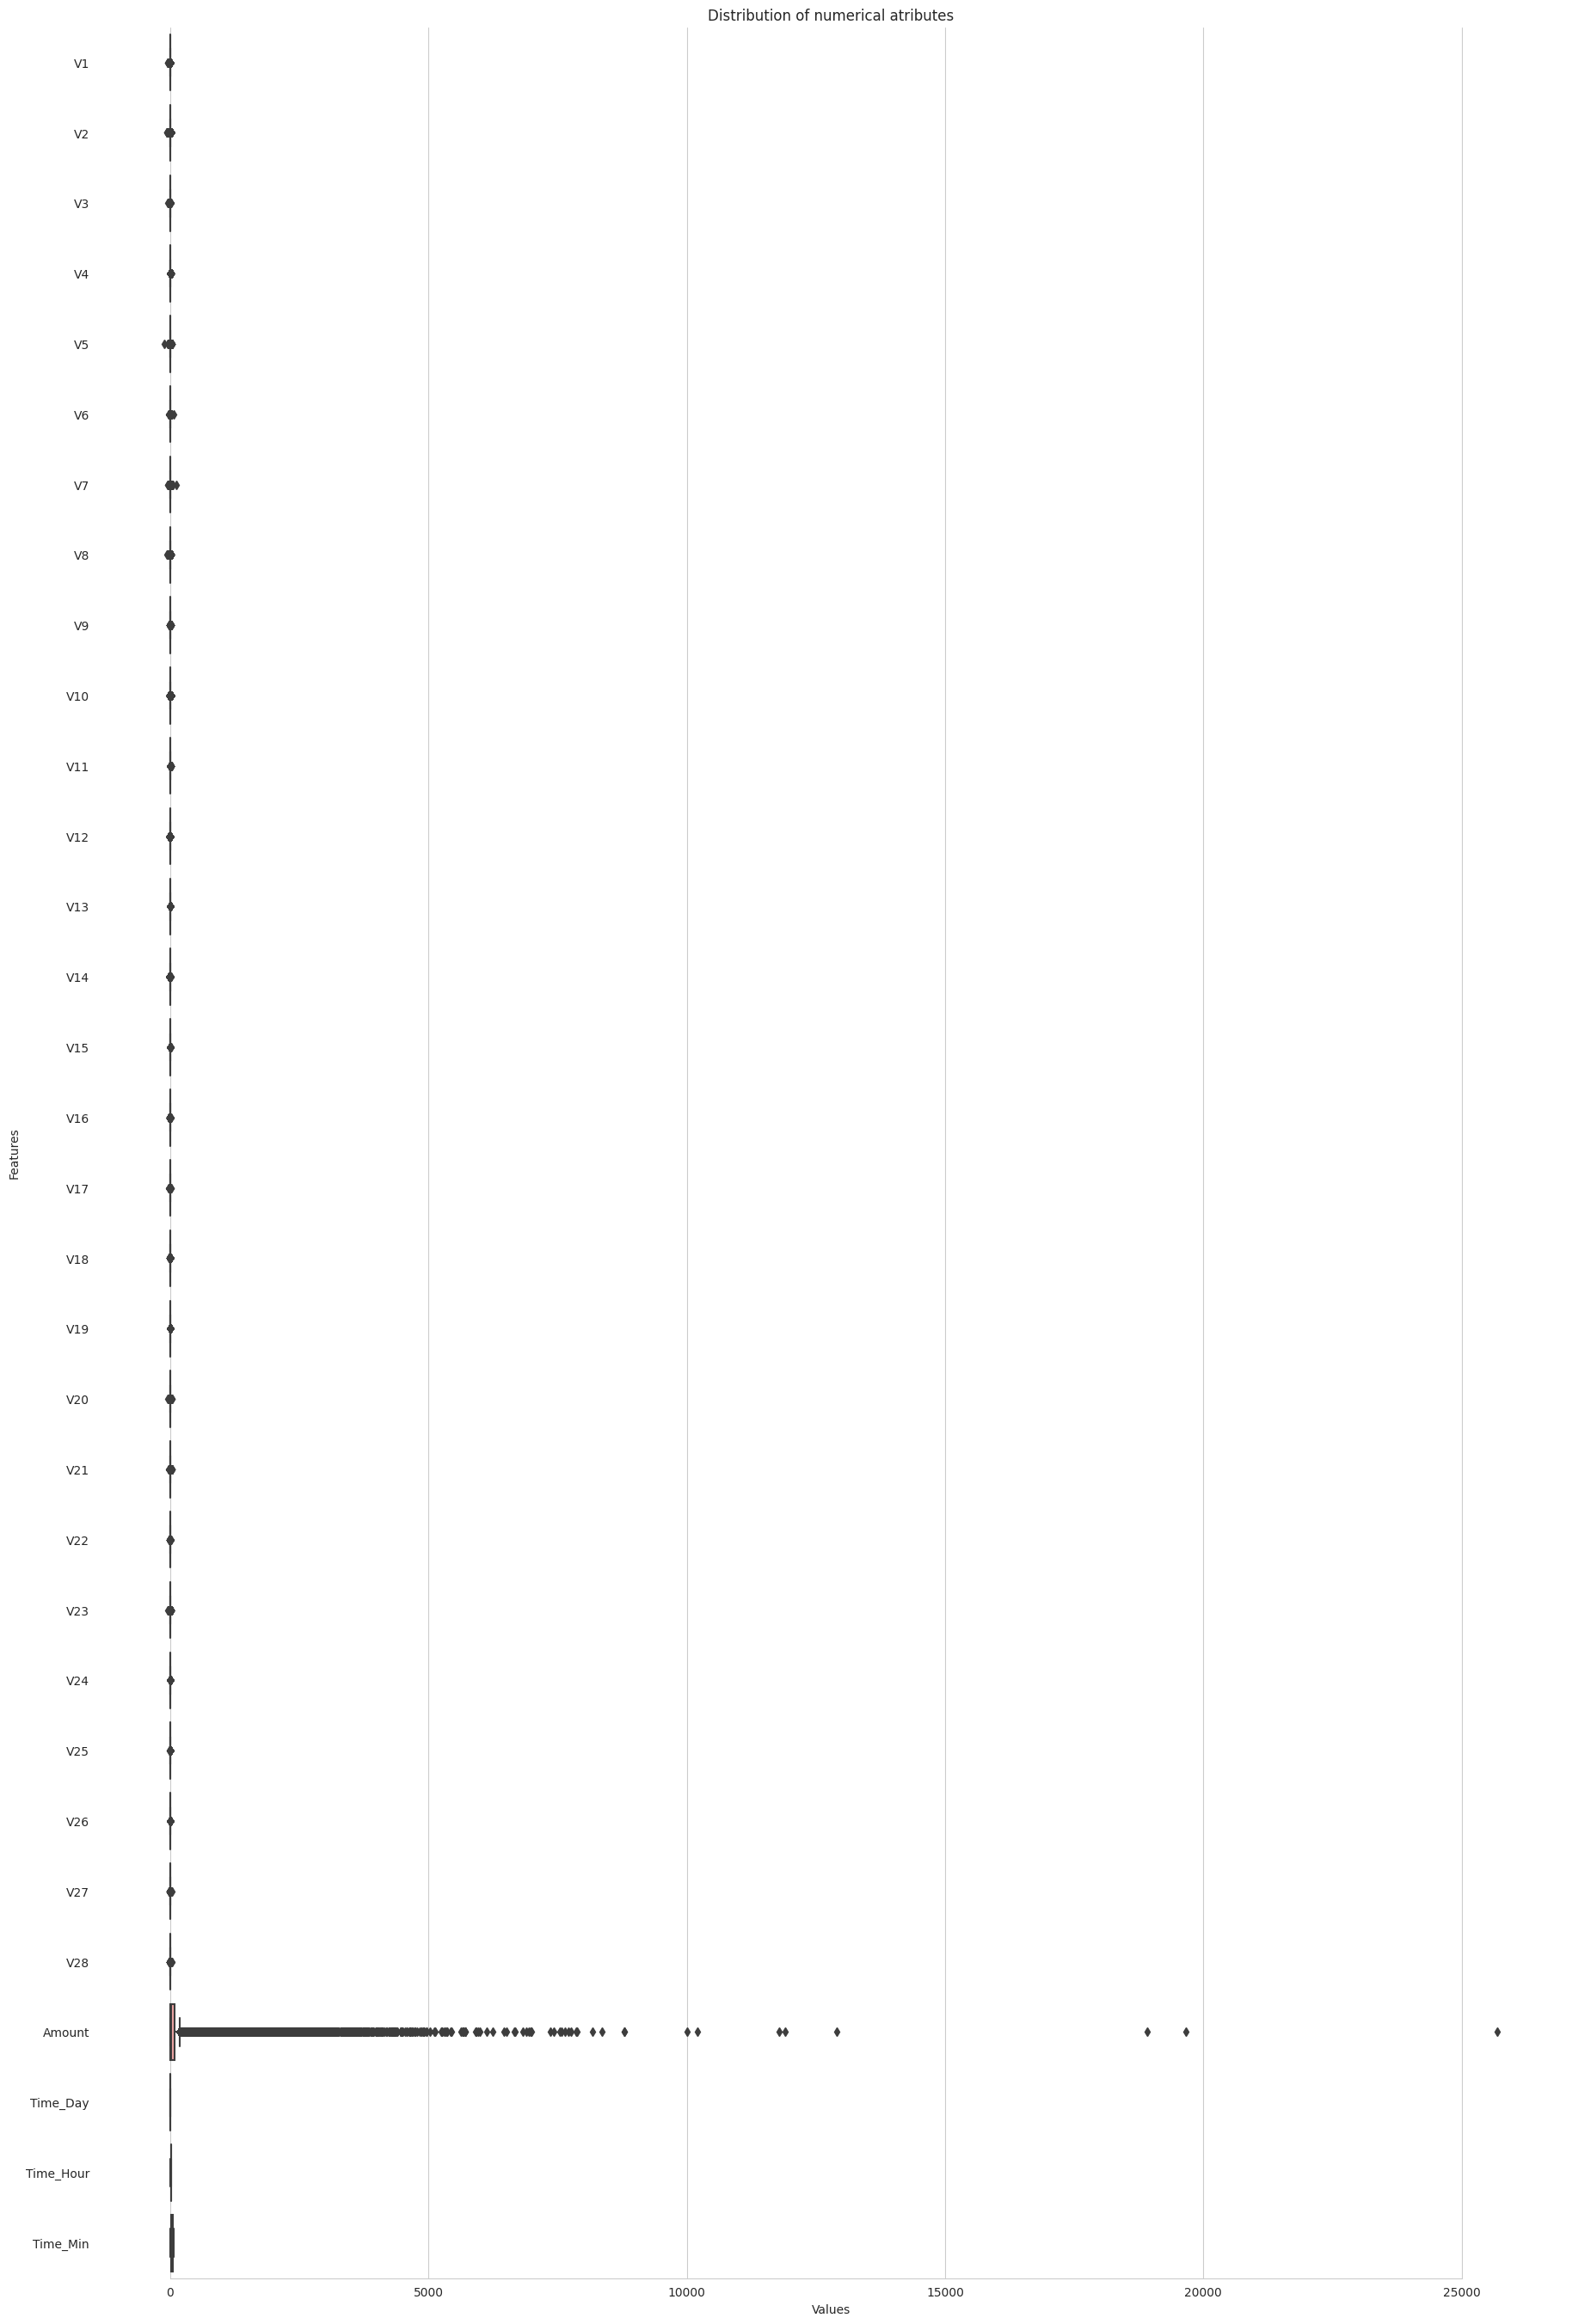

In [27]:
# Boxplot to understand the distribution of numerical attributes :

# Selecting only numerical feature from the dataframe:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Excluding BINARY target feature and Time variable as its not needed for transformation : 
li_not_plot = ['Class','Time']
li_transform_num_feats = [c for c in list(numeric_features) if c not in li_not_plot]

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(22,34))
# Using log scale:
#ax.set_xscale("log")
ax = sns.boxplot(data=df[li_transform_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True,left=True)

In [28]:
# Drop unnecessary columns
# As we have derived the Day/Hour/Minutes from the time column we will drop Time
df.drop('Time', axis = 1, inplace= True)
#also day/minutes might not be very useful as this is not time series data, we will keep only derived column hour
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

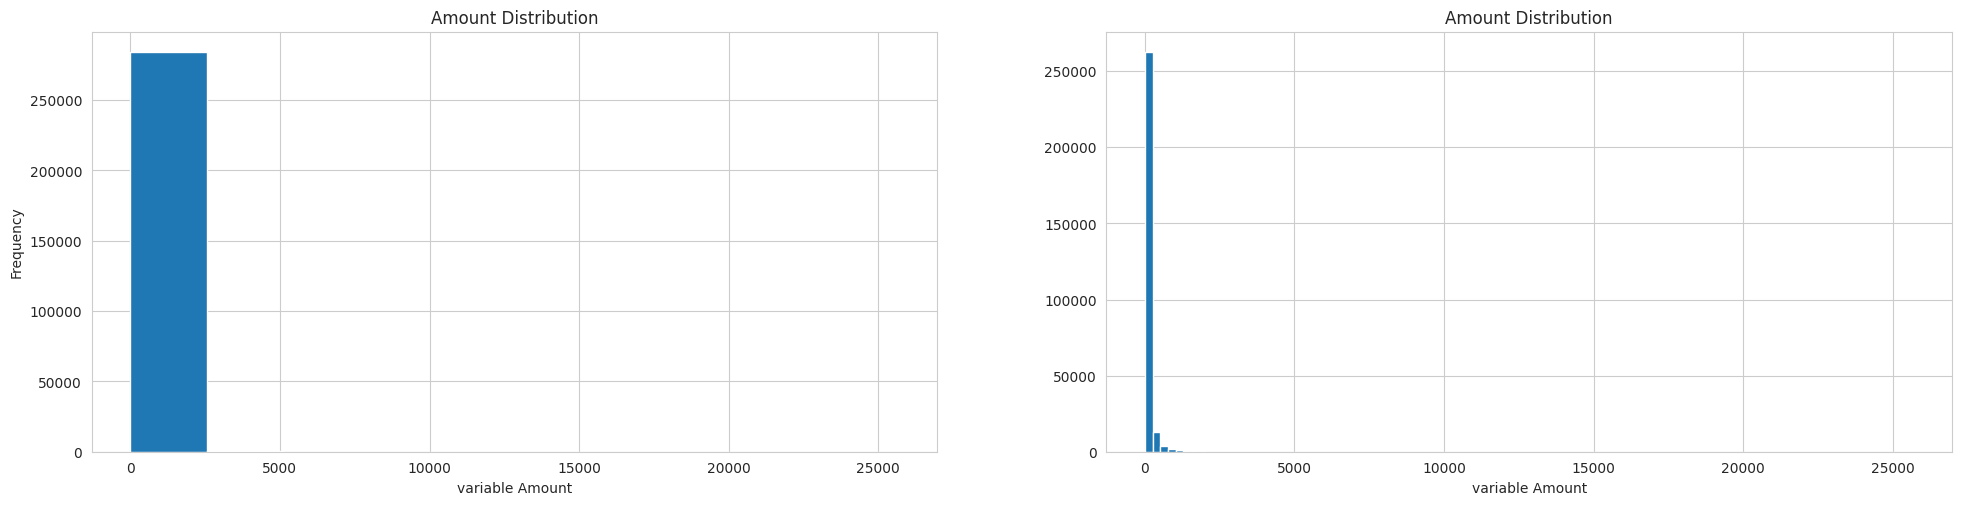

In [29]:
# Let's try to understand the Amount variable as it is not PCA transformed variable :

plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

### Splitting the data into train & test data

In [30]:
y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

((284807,), (284807, 30))

In [ ]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Time_Hour  
0  0.128539 -0.189115  0.133558 -0.021053  149.62          0  
1  0.167170  0.125895 -0.008983  0.014724    2.69          0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66          0  
3  0.647376 -0.221929  0.062723  0.061458  123.50          0  
4 -0.206010  0.502292  0.219422  0.215153   69.99          0  

[5 rows x 30 columns]

In [31]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

Preserve X_test & y_test to evaluate on the test data once you build the model


In [32]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [33]:
# Checking the split of the class label
print(" Fraudulent Count for Full data : ",np.sum(y))
print("Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data : ",np.sum(y_test))

 Fraudulent Count for Full data :  492
Fraudulent Count for Train data :  396
 Fraudulent Count for Test data :  96


Plotting the distribution of a variable

In [34]:
cols = list(X.columns.values)


In [35]:
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

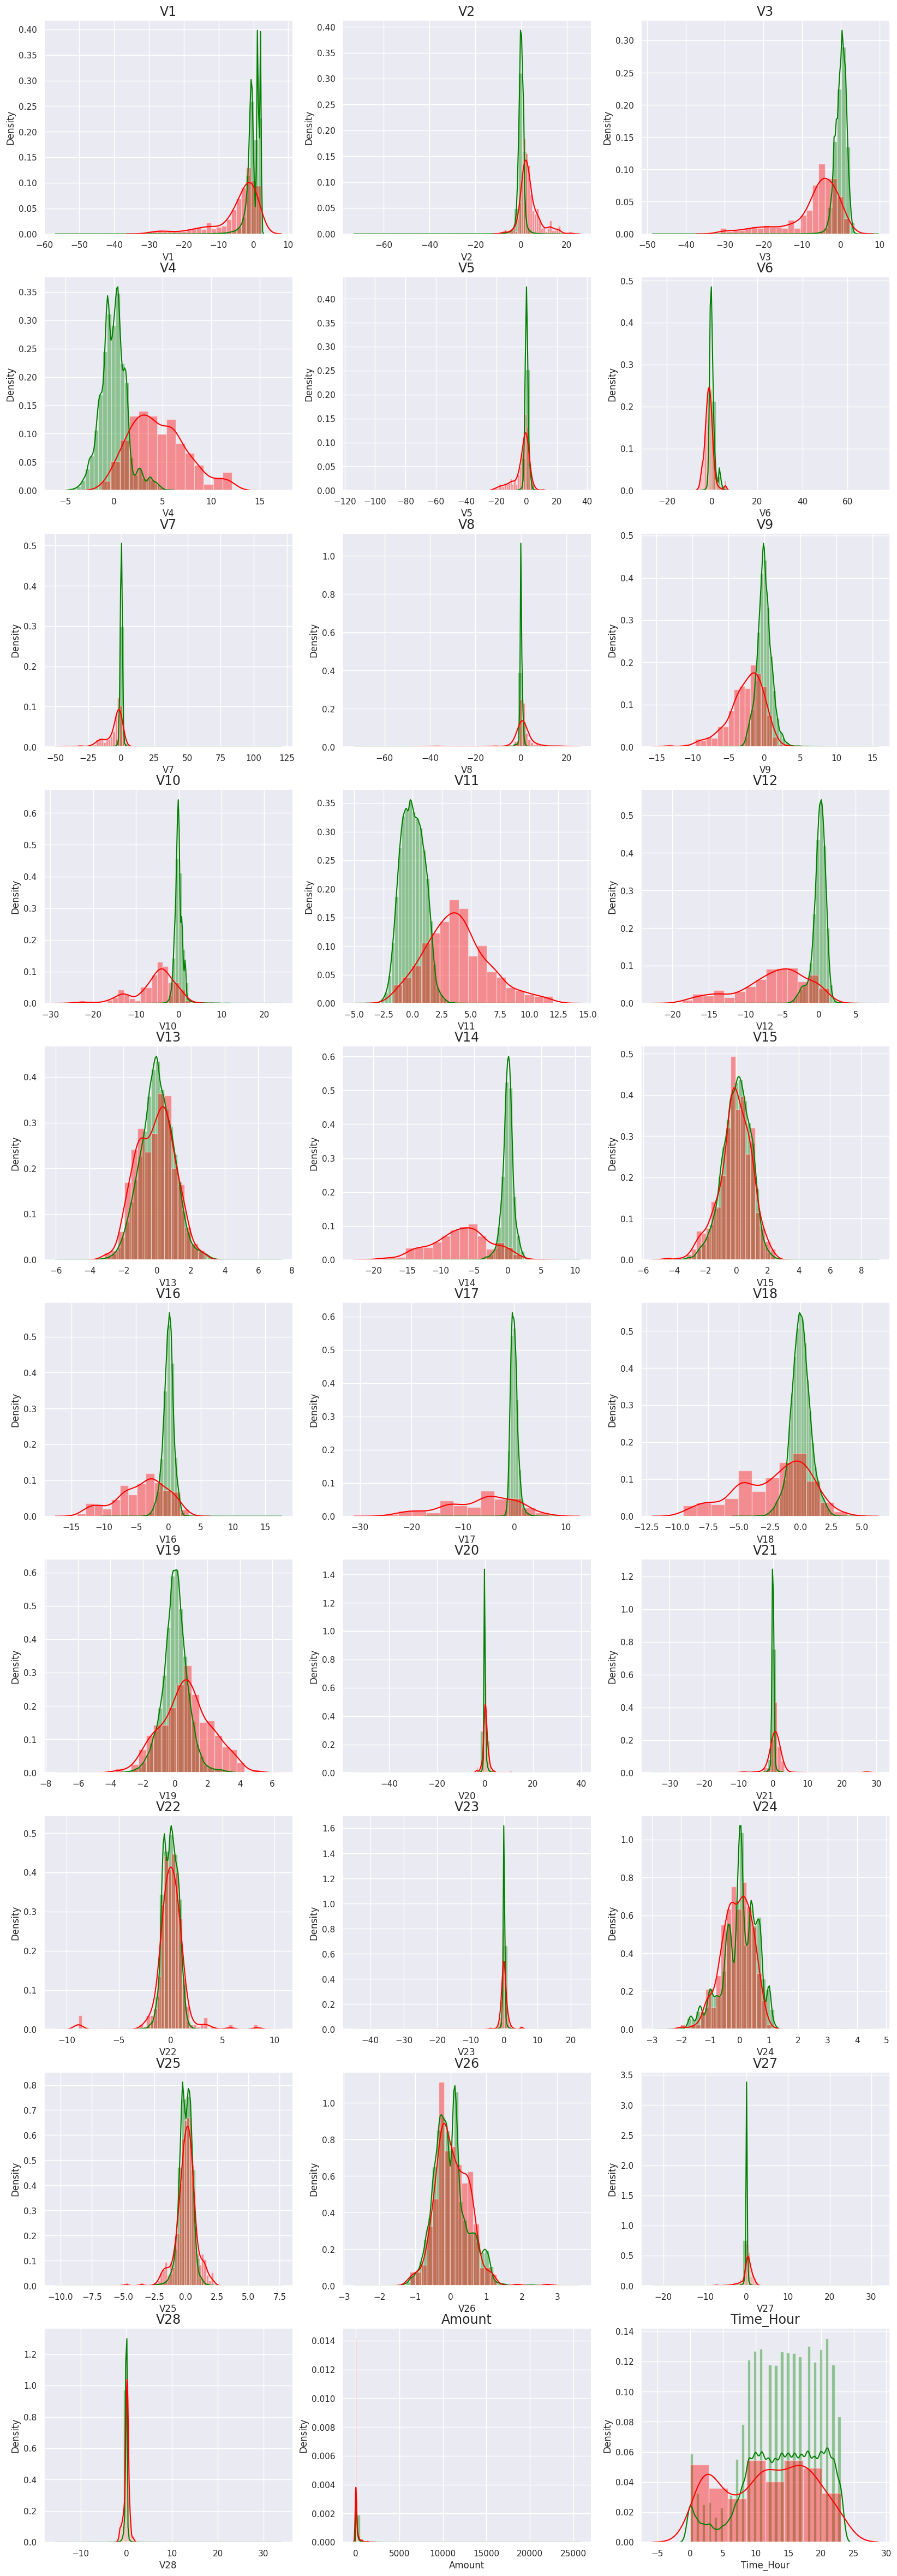

In [36]:
# plot the histogram of a variable from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

Feature Scaling using RobustScaler Scaler
We need to scale Amount column.

In [37]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [38]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   

              V8        V9       V10  ...       V21       V22       V23  \
201788  0.192230  1.124319 -0.037763  ... -0.195207 -0.477813  0.340513   
179369 -0.049137 -0.732566  0.297692  ... -0.124288 -0.263560 -0.110568   
73138   0.919341 -0.612193 -0.966197  ...  0.274911 -0.319550  0.212891   
208679 -0.539483 -0.813368  0.785431  ... -0.406722 -0.899081  0.137370   
206534 -0.449263 -0.717258  0.851668  ...  0.050447  0.125601  0.215531   

             V24       V25       V26       V27       V28    Amount  Time_Hour  
201788  0.059174 -0.431015 -0.297028 -0.000063 -0.046947 -0.295107         13  
179369 -0.434224 -0.509076  0.719784 -0.006357  0.146053  0.196553         10  
73138  -0.268792  0.241190  0.318445 -0.100726 -0.365257  2.195580         15  
208679  0.075894 -0.244027  0.455618 -0.094066 -0.031488  2.211009         14  
206534 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872 -0.191827         13  

[5 rows x 30 columns]

In [39]:
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10  ...       V21       V22       V23  \
49089   1.036103  0.745991 -0.147304  ... -0.170060 -0.288750 -0.130270   
154704  0.752811  1.962566 -1.025024  ... -0.184153 -0.089661  0.087188   
67247   0.303698  1.042073 -0.437209  ...  0.028010 -0.384708 -0.128376   
251657 -0.216140  0.680314  0.079977  ... -0.357993 -0.905085  0.223474   
201903 -0.254233 -1.959060  0.948915  ... -0.035049  0.271455  0.381606   

             V24       V25       V26       V27       V28    Amount  Time_Hour  
49089   1.025935  0.847990 -0.271476  0.060052  0.018104 -0.278148         12  
154704  0.570679  0.101899  0.620842 -0.048958 -0.042831 -0.208646          4  
67247   0.286638 -0.136700  0.913904 -0.083364  0.052485  3.949958         14  
251657 -1.075605 -0.188519  0.267672 -0.071733 -0.072238 -0.292049         19  
201903  0.332001 -0.334757  0.448890  0.168585  0.004955  0.114957         13  

[5 rows x 30 columns]

Plotting the distribution of a variable to handle skewness¶


##### Preserve X_test & y_test to evaluate on the test data once you build the model

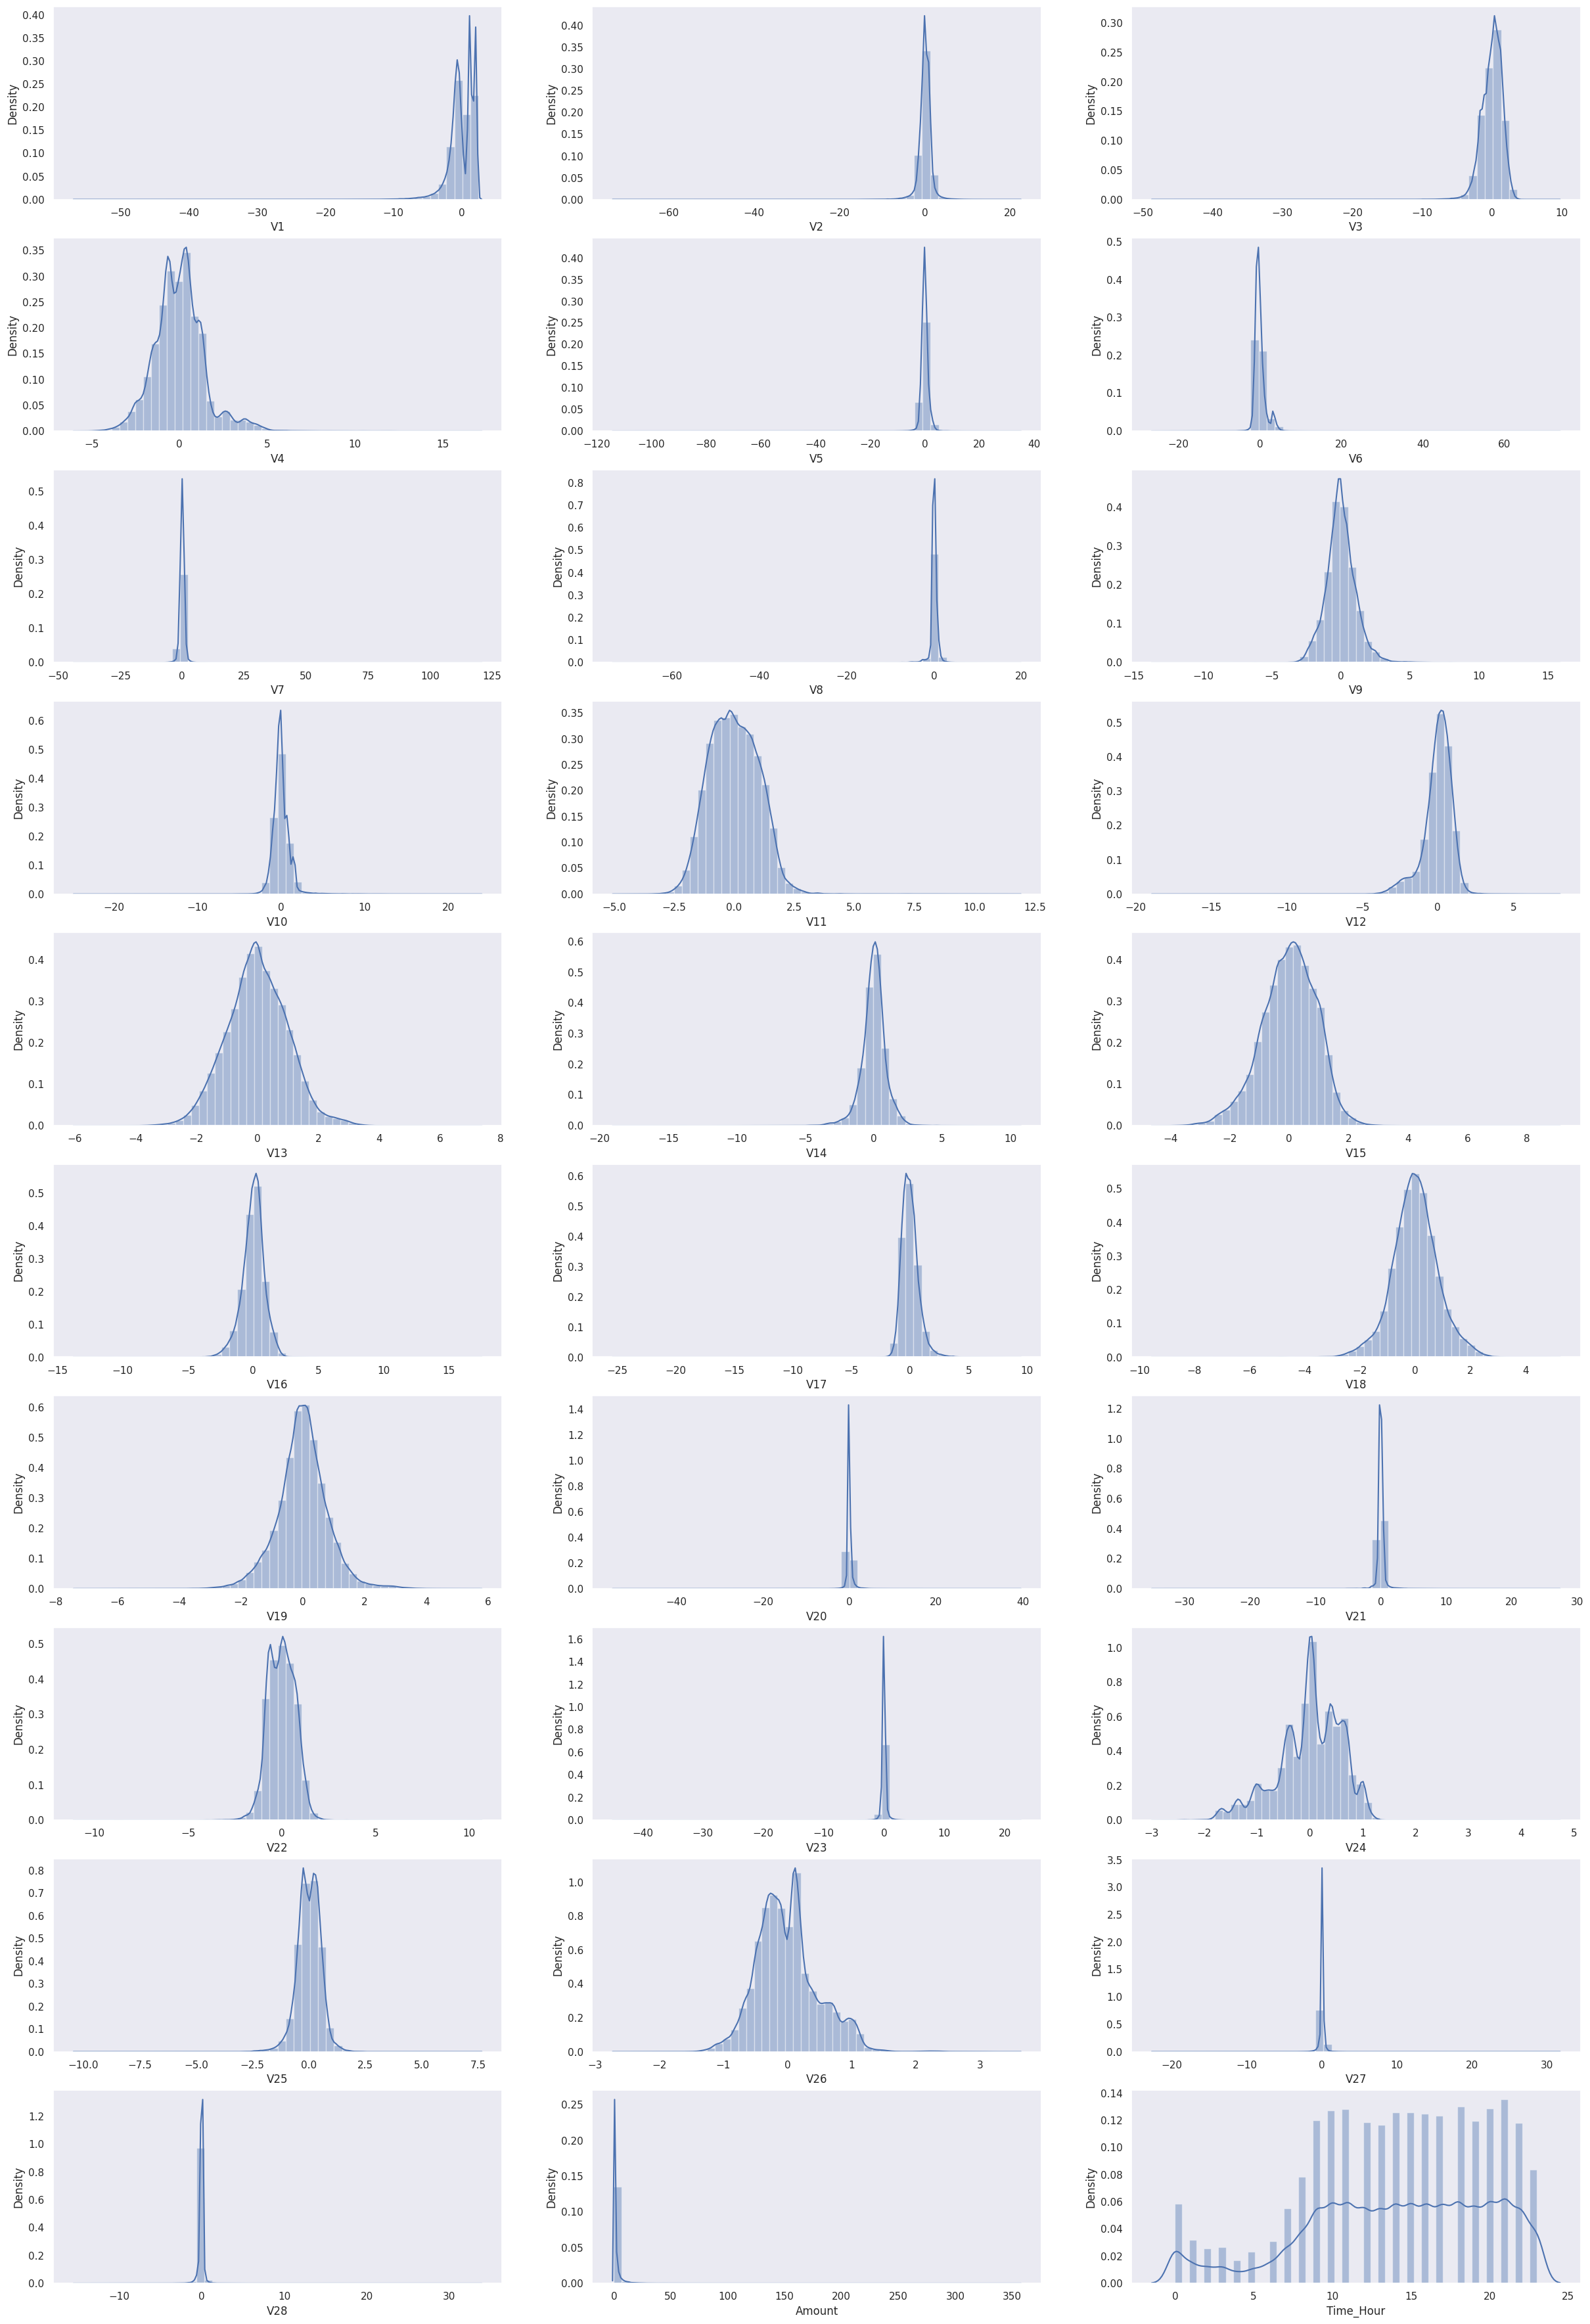

In [40]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

Lot of features are highly skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [41]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp

Skewness
Features            
V1         -3.277668
V2         -4.890421
V3         -2.274281
V4          0.687466
V5         -2.806948
V6          1.944495
V7          3.180573
V8         -8.851621
V9          0.542097
V10         1.112318
V11         0.364167
V12        -2.303473
V13         0.061568
V14        -2.014879
V15        -0.312641
V16        -1.119031
V17        -4.048546
V18        -0.267691
V19         0.111071
V20        -1.810953
V21         3.034115
V22        -0.194068
V23        -5.965240
V24        -0.555467
V25        -0.423168
V26         0.579692
V27        -0.773110
V28        11.134475
Amount     18.155243
Time_Hour  -0.491018

In [42]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [43]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

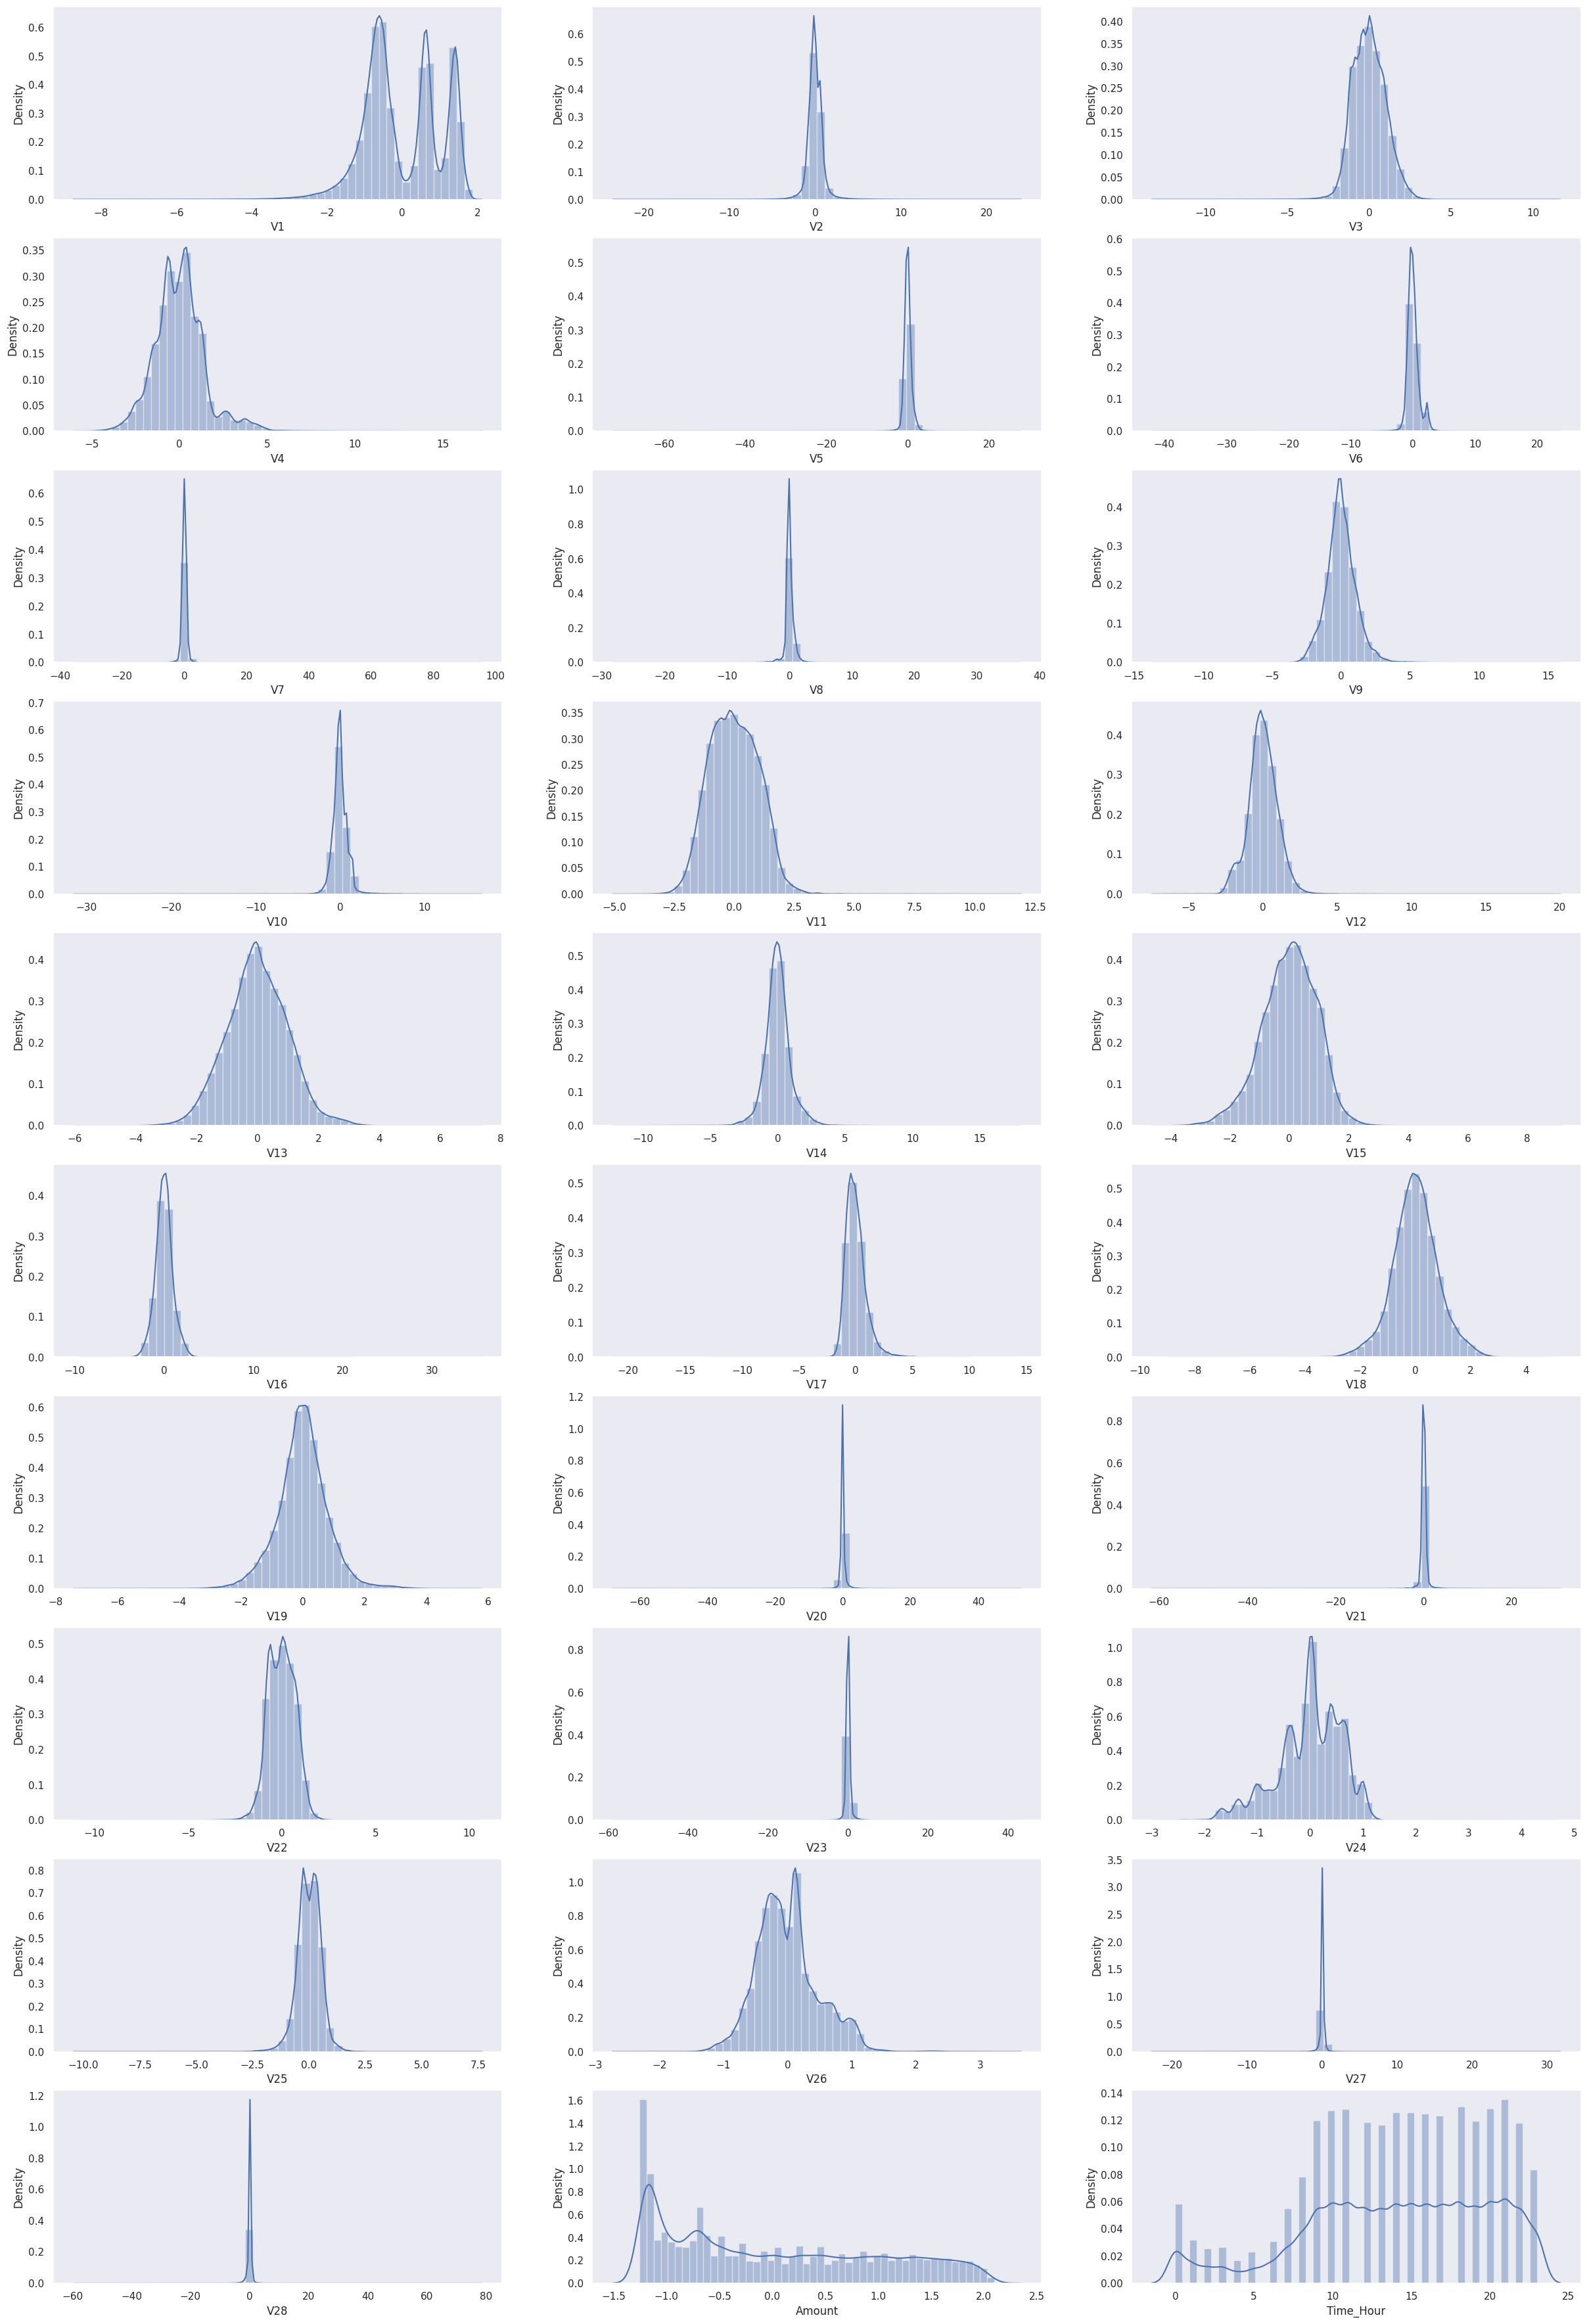

In [44]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset again to see the result 
var = X_train.columns

plt.figure(figsize=(30,45))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

Model Building with imbalanced data
We are going to build models on below mentioned algorithms and we will compare for the best model. We are not building models on SVM, and KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN. Skipped models' process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models. Working with below models:

- Logistic Regression
- Decision Tree
- RandomForest
- XGBoost

In [45]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [46]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

In [47]:
def buildAndRunLogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model #import the package
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [48]:
def buildAndRunKNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate KNN  model
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [49]:
def buildAndRunSVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [50]:
def buildAndRunTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results


In [51]:
def buildAndRunRandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate Random Forest model

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [52]:
def buildAndRunXGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
  #Evaluate XGboost model
  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score
  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results
  

In [53]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [54]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9841097814869156
Max auc_roc for l1: 0.9855834871454083
Parameters for l2 regularisations
[[-0.08756869 -0.07359796 -0.27493384  0.54934621  0.03170842  0.01475436
  -0.06674228 -0.22168142 -0.18457176 -0.21218378  0.16641799 -0.49075095
  -0.12008316 -0.64868277 -0.08622222 -0.17823526 -0.078285    0.03361174
  -0.0361556  -0.02206765  0.10321725  0.10463948 -0.03033931 -0.0300526
   0.0031566   0.0104331  -0.04070652 -0.02391527  0.01989957  0.08577226]]
[-8.0464138]
{1: array([[0.90699469, 0.90699469, 0.90699469, 0.90699469, 0.90699591,
        0.90753684, 0.96906091, 0.99281531, 0.99534656, 0.9956274 ,
        0.99511578, 0.99511578, 0.99511578, 0.99511578, 0.99511578,
        0.99511578, 0.99511578, 0.99511578, 0.99511578, 0.99511578],
       [0.93289888, 0.93289758, 0.93289758, 0.93289758, 0.93289888,
        0.93322078, 0.96499831, 0.97966864, 0.97871587, 0.9794075 ,
        0.9794075 , 0.9794075 , 0.9794075

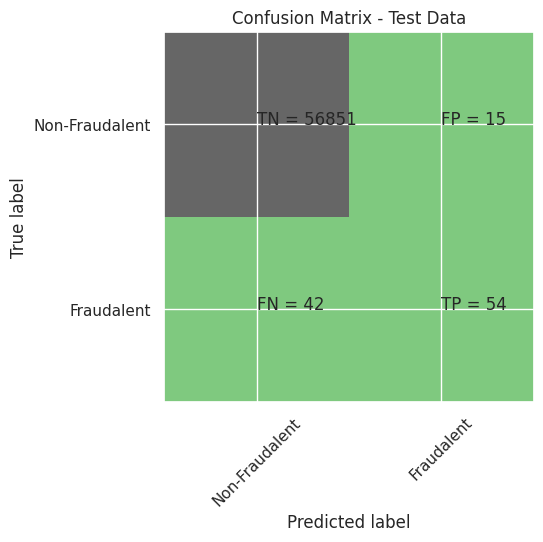

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


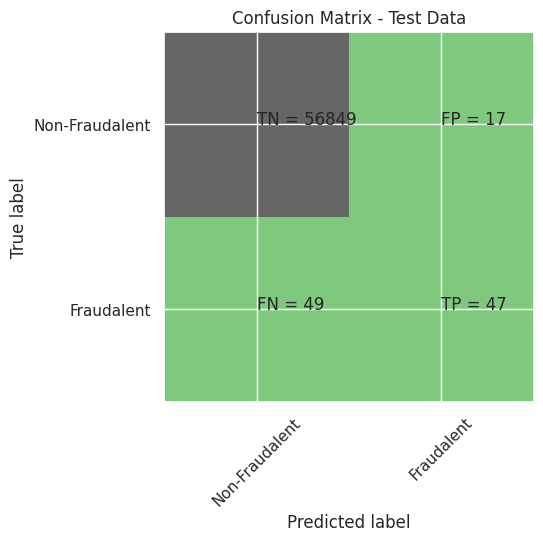

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9681231608811358
l2 threshold: 0.0012798481890331952
ROC for the test dataset 96.8%


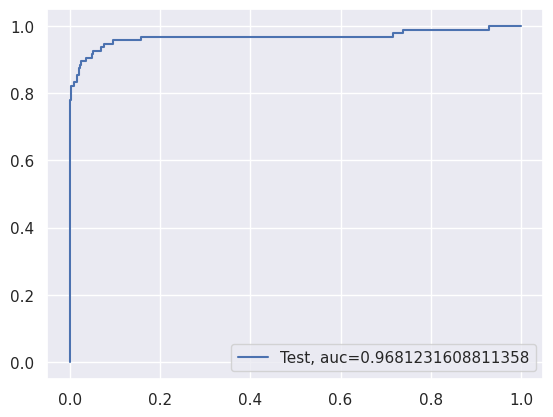

l1 roc_value: 0.9638142372712459
l1 threshold: 0.009217100562451569
ROC for the test dataset 96.4%


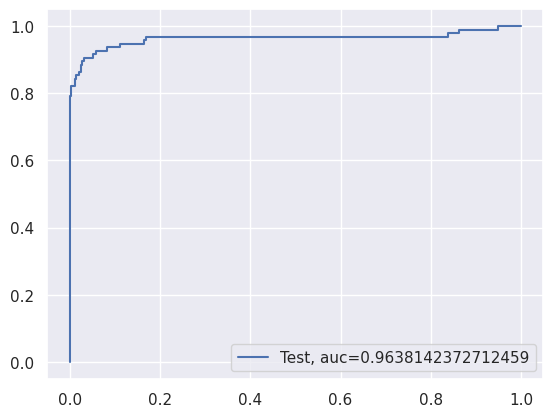

Time Taken by Model: --- 165.65973949432373 seconds ---
--------------------------------------------------------------------------------
KNN Model
model score
0.9993153330290369
Confusion Matrix


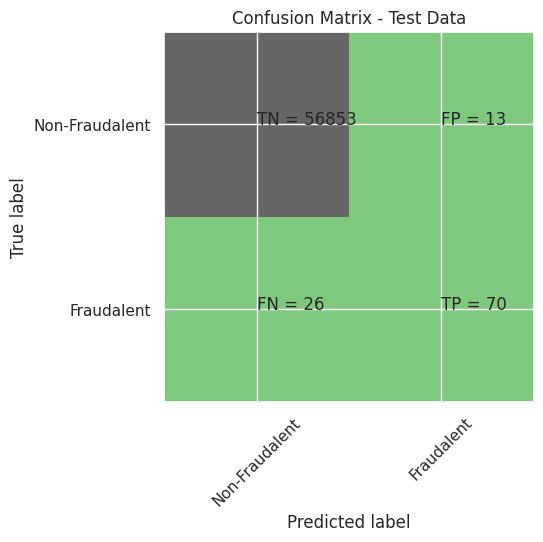

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.73      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

SyntaxError: ignored

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf = ___  #initialise the model with optimum hyperparameters
clf.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [ ]:
# Function to plot ROC curve and classification score which will be used for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

#def clf_score(clf):
   # prob = clf.predict_proba(X_test)
   # prob = prob[:, 1]
   # auc = roc_auc_score(y_test, prob)    
   # print('AUC: %.2f' % auc)
  #  fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label='Non_Fraudulent')
  #  plot_roc(fpr,tpr)
  #  predicted=clf.predict(X_test)
  #  report = classification_report(y_test, predicted)
  #  print(report)
  #  return auc

def clf_score(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test, prob, pos_label=1)  # Replace 'Non_Fraudulent' with the appropriate numeric label
    plot_roc(fpr, tpr)
    predicted = clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package
# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import GridSearchCV
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('')
  

C: 0.001
Coefficient of each feature: [[-0.04570583  0.02992887 -0.14776837  0.28189255  0.02954137 -0.03846127
  -0.04053247 -0.11988734 -0.10711922 -0.21287299  0.1726372  -0.23814797
  -0.04077083 -0.38591201 -0.0109084  -0.12231414 -0.130216   -0.00885602
   0.00763496  0.00449293  0.05255992  0.01704191 -0.00980666 -0.01809129
  -0.0055349   0.00538688 -0.00058536 -0.00389512  0.00669195  0.008309  ]]
Training accuracy: 0.9991090434286467
Test accuracy: 0.9988588883817282

C: 0.01
Coefficient of each feature: [[-0.06584312 -0.04070418 -0.27476618  0.45108875  0.04389644  0.01872862
  -0.06969151 -0.21821025 -0.1465866  -0.20914062  0.11044224 -0.51557696
  -0.12801809 -0.67173621 -0.08512067 -0.21915878 -0.07948037  0.06454537
  -0.04680987 -0.03143241  0.11437001  0.12118741 -0.03649778 -0.01497055
   0.01568785 -0.00147114 -0.06463228 -0.02722415  0.0526294   0.02951691]]
Training accuracy: 0.9993284908600145
Test accuracy: 0.9990344440153085

C: 0.1
Coefficient of each feature:

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

#perform hyperparameter tuning



#print the optimum value of hyperparameters

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9838474080582803


Best parameters : {'C': 0.01, 'penalty': 'l2'}


AUC: 0.97


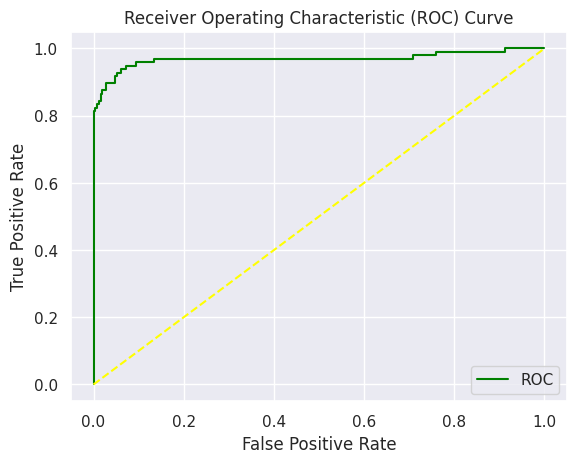

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.81      0.56      0.66        96

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



0.9683843743771908

In [ ]:
# Fitting the model with best parameters .

lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)


The AUC score is 0.98 but the data is clearly overfitting due to the imbalanced data.

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [ ]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Taking only odd integers as K values to apply the majority rule. 
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
k_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [ ]:
# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.

for k in k_range:
  knn_clf = KNeighborsClassifier(n_neighbors=k)
  knn_clf.fit(X_train,y_train)
  score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

In [ ]:
#Fitting the best parameter to the model
# 3 fold cross validation with K=3

knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

In [ ]:
# Checking AUC 

clf_score(knn_clf)

AUC: 0.90


TypeError: ignored

The KNN model with imbalanced data gives AUC of 0.94 which is pretty good but recall is 0.77 which is the score we should look to improve in this case.

In [ ]:
Decision Trees

In [ ]:
#importing libraries

from sklearn import tree
from pprint import pprint

In [ ]:
# 5 fold cross validation for getting best parameter

depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9991441550176654, 0.9993460466545241, 0.9993416577058966, 0.999420658781189, 0.9994777151133445, 0.9994601593188353, 0.9994557703702078, 0.9994426035243258, 0.9994294366784437, 0.9994338256270711, 0.9994294366784437, 0.9993284908600145, 0.9993723803462882, 0.9992933792709955, 0.9993109350655051, 0.9992714345278589, 0.9992670455792314, 0.9992143781957032, 0.9991924334525664]


In [ ]:
#Plotting depth against score

plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

The score for depth=5 is the highest. We will use this in our model.

In [ ]:
#Fitting the model with depth=5 and plotting ROC curve

dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

#Plotting ROC
clf_score(dt_clf)

The AUC score for decision tree is only 0.88 which is not satisfactory. The precison and recall are also lower than KNN and logistic regression model.

Random Forest Classifier

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier()
clf_rfc_cv = GridSearchCV(rfc, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

We will use these parameters for Random forest {'max_depth': 9, 'n_estimators': 30}. The Accuracy is 0.97 which is very good.

In [ ]:
#Fitting model and plotting ROC

rf = RandomForestClassifier(max_depth=9, n_estimators=30)
RFC_clf = rf.fit(X_train,y_train)

#Plotting ROC
clf_score(RFC_clf)

We are getting very good precision(0.97) for Faudulent class which is very good along with the AUC of 0.97

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)